### IMPORT LIBRARIES


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import hvplot.pandas

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

### Loading the Data

In [2]:
df=pd.read_csv(r"F:\insightsol technologies\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Data Preprocessing

In [5]:
df.stories.unique(),df.bedrooms.unique(),df.mainroad.unique(),df.guestroom.unique(),df.basement.unique(),df.prefarea.unique()

(array([3, 4, 2, 1], dtype=int64),
 array([4, 3, 5, 2, 6, 1], dtype=int64),
 array(['yes', 'no'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['yes', 'no'], dtype=object))

In [6]:
df.hotwaterheating.unique(),df.airconditioning.unique(),df.parking.unique(),df.furnishingstatus.unique()

(array(['no', 'yes'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array([2, 3, 0, 1], dtype=int64),
 array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object))

In [7]:
df.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [8]:
df.bedrooms.value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

Text(0.5, 1.0, 'Distribution of Price')

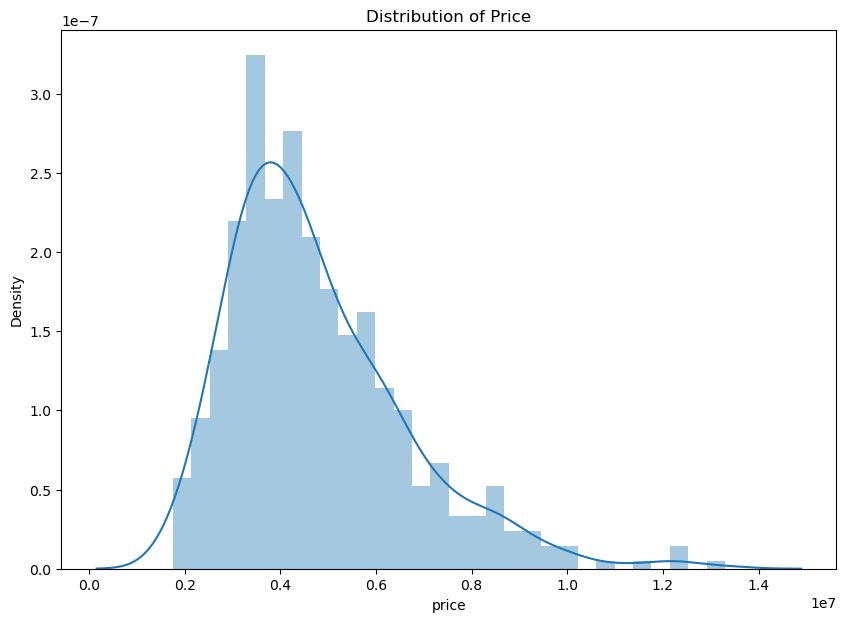

In [9]:
plt.figure(figsize=(10,7))
sn.distplot(df['price'], bins = 30)
plt.title('Distribution of Price')

In [10]:
le_mainroad=LabelEncoder()
df['mainroad']=le_mainroad.fit_transform(df['mainroad'])

In [11]:
le_guestroom=LabelEncoder()
df['guestroom']=le_guestroom.fit_transform(df['guestroom'])

In [12]:
le_basement=LabelEncoder()
df['basement']=le_basement.fit_transform(df['basement'])

In [13]:
le_hotwaterheating=LabelEncoder()
df['hotwaterheating']=le_hotwaterheating.fit_transform(df['hotwaterheating'])

In [14]:
le_airconditioning=LabelEncoder()
df['airconditioning']=le_airconditioning.fit_transform(df['airconditioning'])

In [15]:
le_prefarea=LabelEncoder()
df['prefarea']=le_prefarea.fit_transform(df['prefarea'])

In [16]:
le_furnishingstatus=LabelEncoder()
df['furnishingstatus']=le_furnishingstatus.fit_transform(df['furnishingstatus'])

In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [18]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


<Axes: >

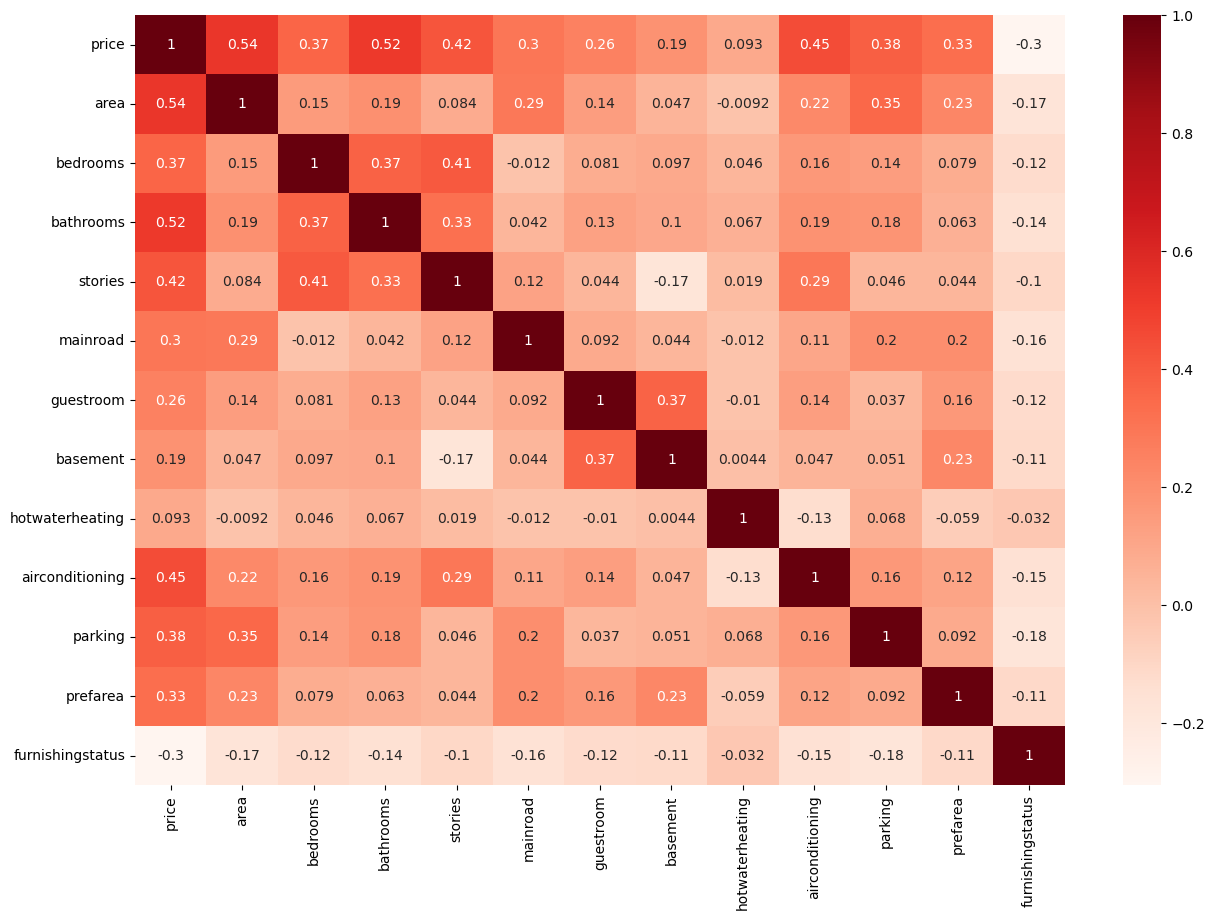

In [19]:
plt.figure(figsize=(15,10))
sn.heatmap(df.corr(), annot=True,cmap='Reds')

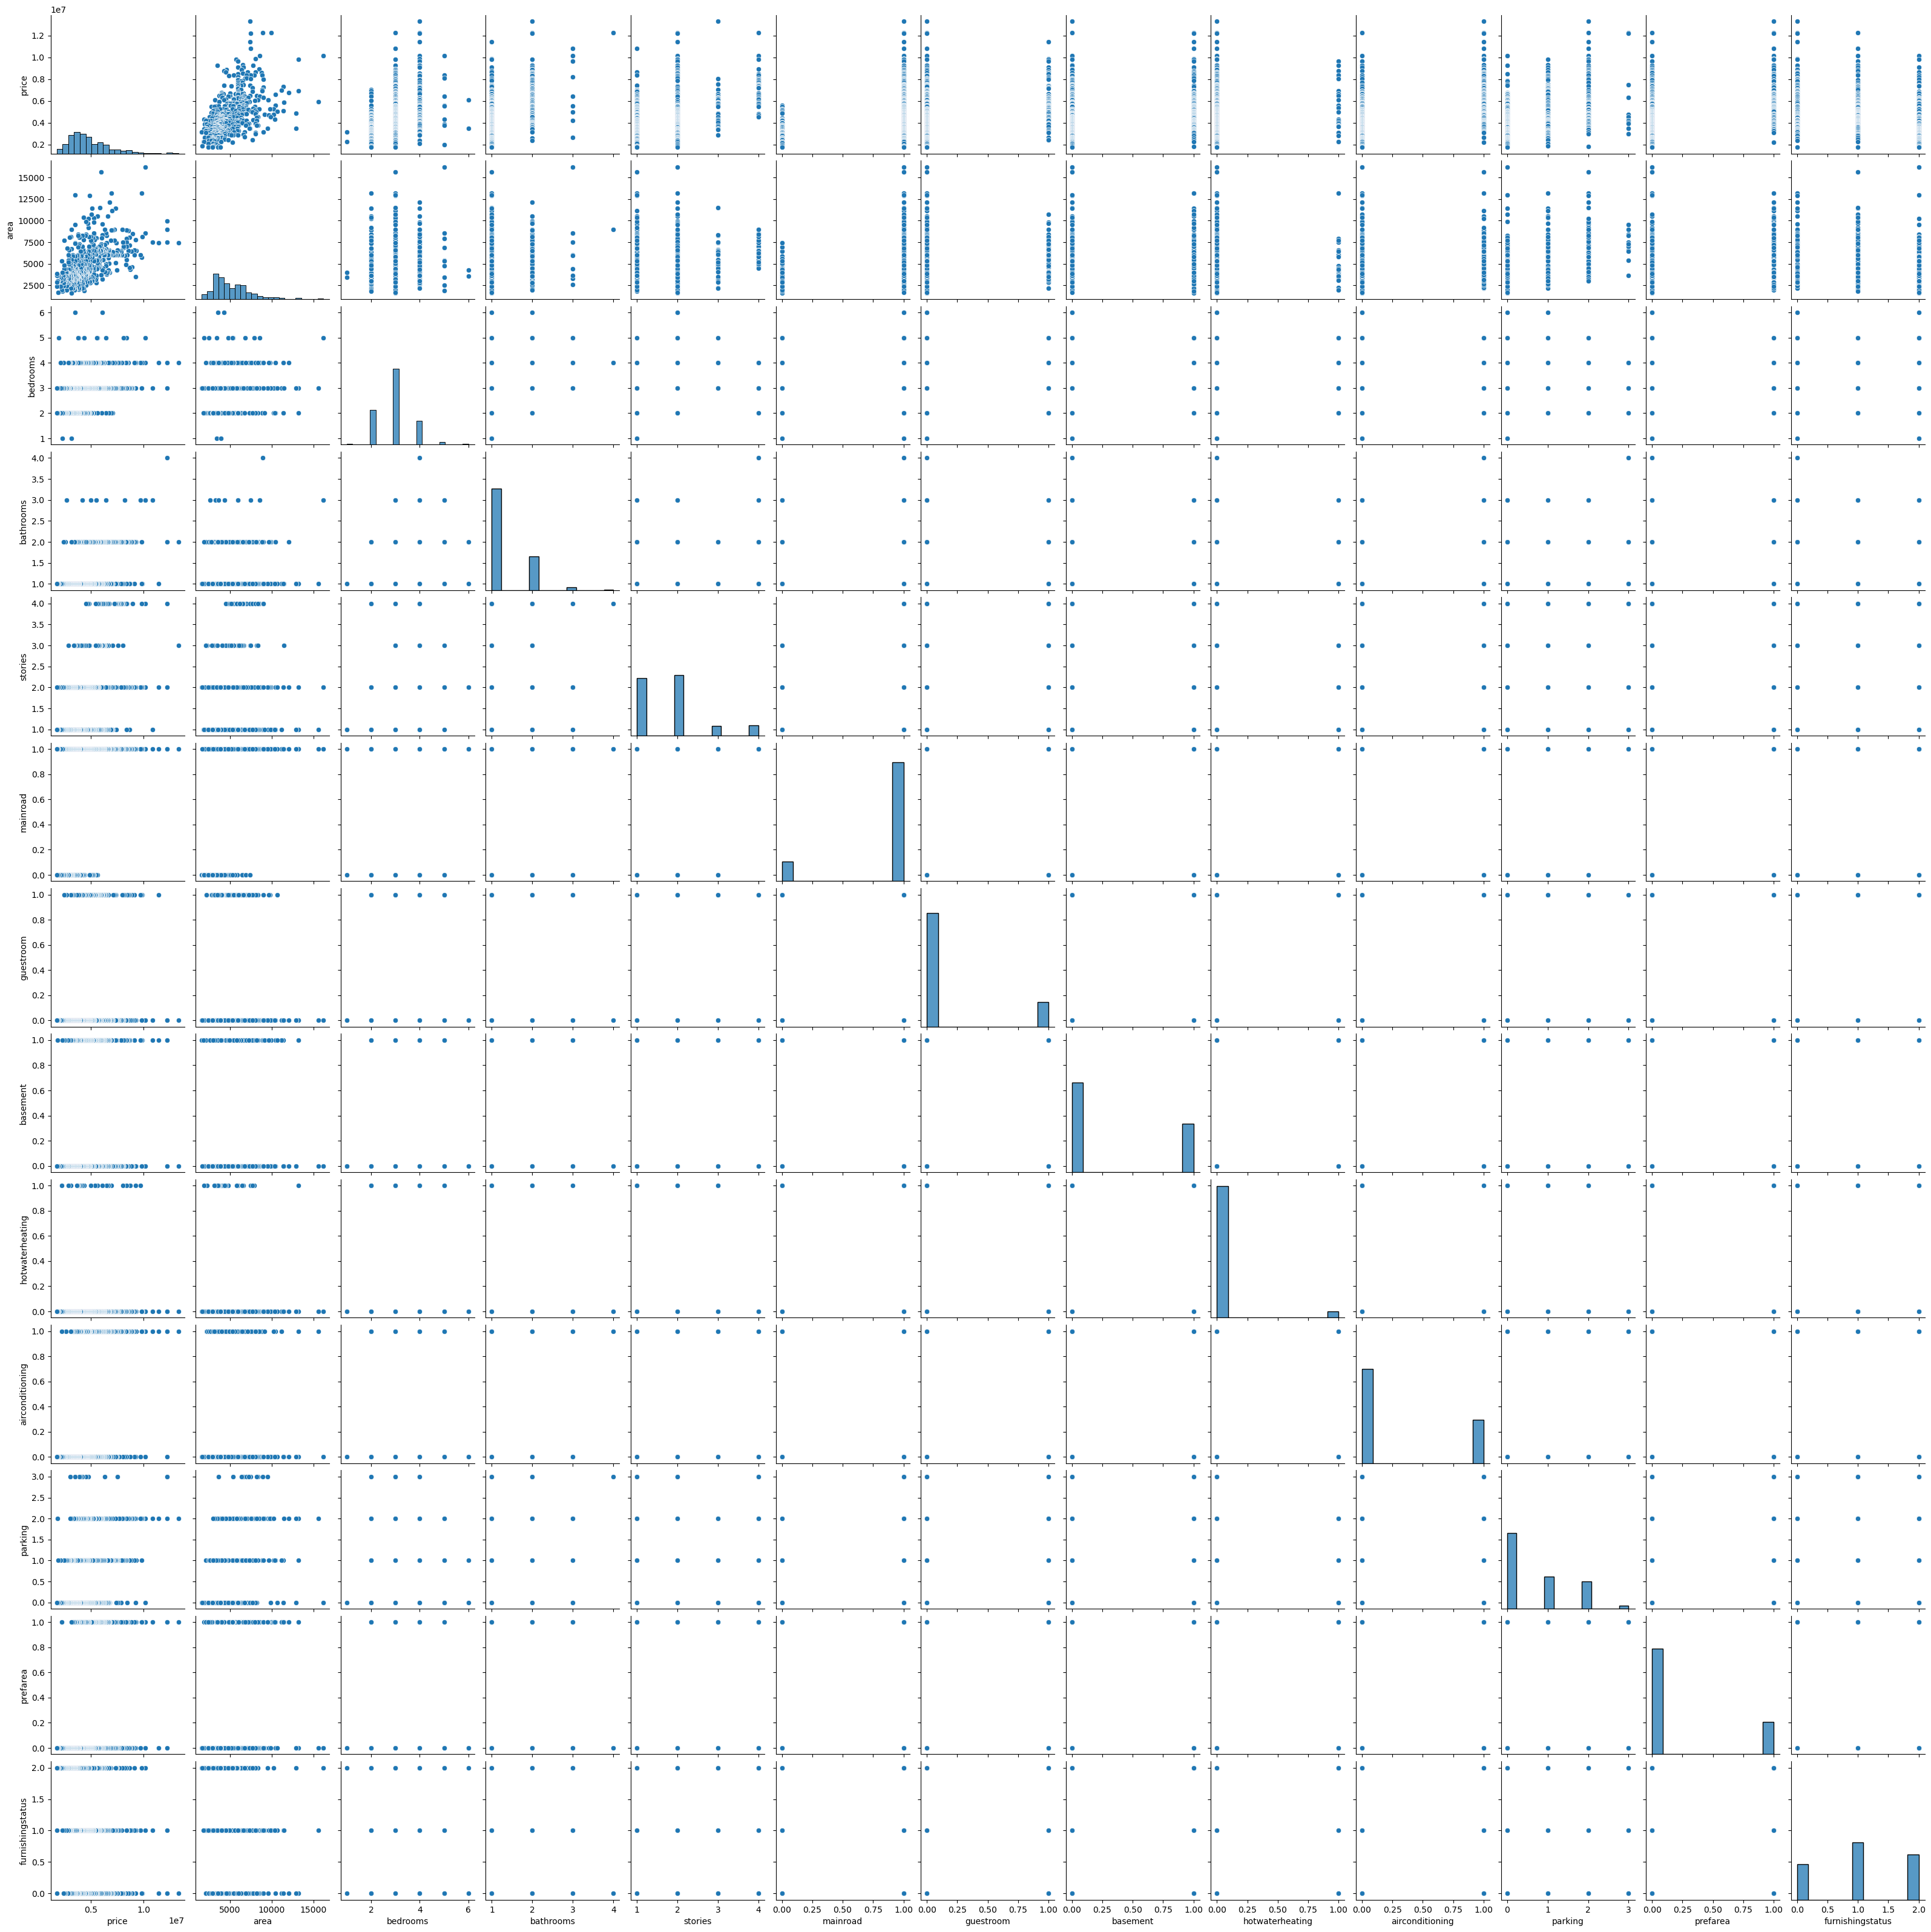

In [20]:
sn.pairplot(df)

## Training a Linear Regression Model

In [21]:
X=df.drop('price', axis=1)

y=df['price']

In [22]:
X.shape,y.shape

((545, 12), (545,))

### Train Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
X_train.shape

(381, 12)

In [25]:
X_test.shape

(164, 12)

### Linear Regression

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
model.coef_

array([ 2.66028776e+02,  1.06819922e+05,  9.50400838e+05,  4.62675653e+05,
        4.08149492e+05,  1.07728026e+05,  4.06933825e+05,  1.04531059e+06,
        8.20713183e+05,  2.93021088e+05,  7.03534010e+05, -2.31445926e+05])

In [29]:
pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])

,Coefficients
area,2.660288e+02
bedrooms,1.068199e+05
bathrooms,9.504008e+05
stories,4.626757e+05
mainroad,4.081495e+05
guestroom,1.077280e+05
basement,4.069338e+05
hotwaterheating,1.045311e+06
airconditioning,8.207132e+05
parking,2.930211e+05


In [30]:
y_pred = model.predict(X_test)

In [31]:
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [32]:
MAE,MSE,RMSE

(808831.3046101703, 1242507083253.1597, 1114678.0177491433)

### Residual Histogram
The residual errors should be random and close to a normal distribution

In [33]:
test_residual= y_test - y_pred

In [34]:
pd.DataFrame({'Error Values': (test_residual)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

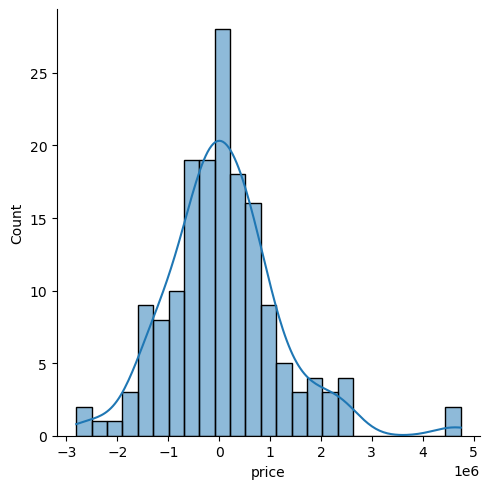

In [35]:
sn.displot(test_residual, bins=25, kde=True)

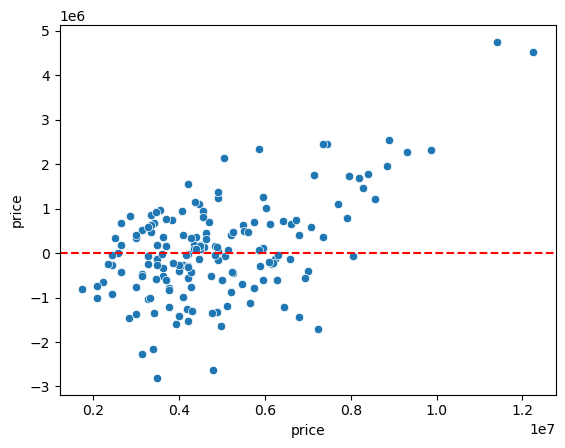

In [36]:
sn.scatterplot(x=y_test, y=test_residual)

plt.axhline(y=0, color='r', ls='--')